# 4th Year Project: Feature Engineering in the Frequency Domain 
`
Last Modified: 5th Apr 2020
Author: Ken Yew Piong, Chin Yang Tan
UCL ID: 16004444
`

### Description:
#### This is a standalone tool to visualise time series, FFT and PSD plots of accelerometer and gyroscope CSV data. </br> It also visualises the statistical trends by level of severity of features extracted in the frequency domain.
```tex
USER GUIDE:
1. Install the required libraries in the 'Library Import' section
2. Copy the directory path to the 'sara-trial-2020' folder provided in Test 10 - Ken_Yew_Feature_Extraction
3. Change the working_path variable in '2.0 Data Extraction' section to the copied path
4. Click Run All and Enjoy!

USAGE: 
Visualisation of time series, FFT and PSD plots
1. For individual plots, go to section '4.3 Individual Plots'
2. For multiple plots by level of severity, go to section '4.4 Multiple Plots by Level of Severity'

Visualisation of statistical trends
3. For individual statistical plots, go to section '5.1.1 Individual Plots'
4. For multiple statistical plots, go to section '5.1.2 Multiple plots by all statistical features'

REFERENCE: 
1. Go to section '4.2.1 Reference List of Key Names to Plot' and '4.2.2 List of multiple plots'
   for the keywords of what to plot
```

---
## Library Import

In [28]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import iqr, skew, kurtosis, variation, pearsonr
from scipy.fftpack import fft
from scipy import signal
from util2 import *

%matplotlib inline
mpld3.enable_notebook()

---
## 1.0 Global Parameters for Plot Customisation

In [29]:
# ========================================================
# Global Configuration Dictionary for Plot Customisation
# ========================================================
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 24,
          'legend.loc': 'best',
          'figure.figsize': (17, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}

# ====================================
# Update plot customisation parameters
# ====================================
pylab.rcParams.update(params)

--- 
## 2.0 Data Extraction

In [3]:
# ========================================================
# 1. Specify the directory path to the dataset of interest
# ========================================================
working_directory = '/Users/kenyew/Documents/Git/Parkinson-Disease-Repository-local/Patient003'
print(working_directory)

# Dictionary storing the manual truncation timestamps for each CSV file
df_dict = {}
patient003_timestamps = {'ftap-lvl0-forearm': [18.8, 31.0, 47.0, 58.4, 72.8, 84.3],
                          'ftap-lvl1-forearm': [19.6, 32.0, 47.2, 59.5, 73.9, 85.8],
                          'ftap-lvl2-forearm': [16.9, 30.0, 44.2, 56.5, 72.0, 84.4],
                          'ftap-lvl3-forearm': [19.9, 32.5, 47.6, 61.0, 77.0, 93.0],
                          'ftap-lvl4-forearm': [16.8, 30.0, 45.0, 57.0, 72.5, 86.2],
                          'ftap-lvl0-wrist': [17.4, 29.5, 44.5, 56.5, 71.8, 83.5],
                          'ftap-lvl1-wrist': [18.5, 31.5, 46.5, 58.5, 73.2, 87.0],
                          'ftap-lvl2-wrist': [20.0, 36.0, 53.0, 65.5, 82.0, 97.0],
                          'ftap-lvl3-wrist': [20.2, 33.0, 47.5, 61.0, 75.5, 88.2],
                          'ftap-lvl4-wrist': [19.5, 33.0, 48.0, 60.0, 74.5, 89.5],
                          'hmove-lvl0-forearm': [19.5, 28.0, 42.8, 49.5, 64.0, 72.0],
                          'hmove-lvl1-forearm': [18.0, 26.0, 43.4, 52.0, 68.0, 78.2],
                          'hmove-lvl2-forearm': [18.4, 31.6, 46.6, 59.5, 74.8, 90.8],
                          'hmove-lvl3-forearm': [17.6, 36.0, 51.2, 62.5, 78.0, 95.0],
                          'hmove-lvl4-forearm': [20.2, 40.5, 55.9, 74.0, 88.6, 111.5],
                          'hmove-lvl0-wrist': [19.0, 25.4, 40.1, 46.5, 60.8, 68.8],
                          'hmove-lvl1-wrist': [15.9, 25.8, 41.7, 50.0, 65.0, 74.9],
                          'hmove-lvl2-wrist': [17.0, 29.0, 44.5, 60.0, 74.0, 90.0],
                          'hmove-lvl3-wrist': [20.0, 35.0, 50.2, 68.2, 82.8, 104.0],
                          'hmove-lvl4-wrist': [18.8, 47.5, 62.5, 88.5, 104.0, 126.0],
                          'tota-lvl0-calf&heel': [20.0, 24.5, 39.6, 44.2, 59.0, 63.8],
                          'tota-lvl1-calf&heel': [23.5, 31.5, 47.0, 54.5, 70.0, 83.0],
                          'tota-lvl2-calf&heel': [16.5, 27.2, 43.0, 53.0, 68.0, 75.8],
                          'tota-lvl3-calf&heel': [19.6, 29.0, 45.0, 61.5, 79.5, 91.0],
                          'tota-lvl4-calf&heel': [19.0, 41.0, 57.5, 73.5, 88.5, 103.0],
                          'tota-lvl0-heel': [19.5, 24.2, 39.8, 44.8, 60.4, 65.0],
                          'tota-lvl1-heel': [24.0, 33.5, 49.0, 58.2, 73.6, 82.2],
                          'tota-lvl2-heel': [17.1, 27.4, 42.9, 54.2, 69.3, 81.8],
                          'tota-lvl3-heel': [17.6, 32.5, 47.8, 64.0, 84.5, 98.0],
                          'tota-lvl4-heel': [19.4, 33.4, 48.8, 60.0, 75.1, 88.5]
}

# ===============================================================================
# 2. Algorithm to automatically apply the truncation timestamps to each CSV file 
#    and store the resulting df in a dictionary database called df_dict
# ===============================================================================
for dirpath, dirnames, filenames in os.walk(working_directory): 
    # For loop through each CSV file within directory
    for filename in filenames: 
        path = os.path.join(dirpath, filename)
        
        # For-if loop to only loop through CSV files that contain the key from patient003_timestamps dictionary
        for gesture in list(patient003_timestamps.keys()): 
            if gesture in filename: 
                
                # Read the entire raw dataframe from CSV file
                df = pd.read_csv(path)
                
                # Extract timestamps from patient003_timestamps dictionary
                start1 = patient003_timestamps[gesture][0]
                end1 = patient003_timestamps[gesture][1]
                start2 = patient003_timestamps[gesture][2]
                end2 = patient003_timestamps[gesture][3]
                start3 = patient003_timestamps[gesture][4] 
                end3 = patient003_timestamps[gesture][5] 
                
                # Manually truncate dataframes into 3 separate trials
                df_trial_1 = df[(df['elapsed (s)'] >= start1) & (df['elapsed (s)'] <= end1)] # truncate the data
                df_trial_2 = df[(df['elapsed (s)'] >= start2) & (df['elapsed (s)'] <= end2)] # truncate the data
                df_trial_3 = df[(df['elapsed (s)'] >= start3) & (df['elapsed (s)'] <= end3)] # truncate the data
                
                # Append new key-value pairs into the database for each truncated dataframe (OUTPUT: df_dict)
                if 'Accelerometer' in filename: 
                    df_dict[gesture+'-accel-trial1'] = pd.DataFrame(df_trial_1)
                    df_dict[gesture+'-accel-trial2'] = pd.DataFrame(df_trial_2)
                    df_dict[gesture+'-accel-trial3'] = pd.DataFrame(df_trial_3)
                elif 'Gyroscope' in filename:
                    df_dict[gesture+'-gyro-trial1'] = pd.DataFrame(df_trial_1)
                    df_dict[gesture+'-gyro-trial2'] = pd.DataFrame(df_trial_2)
                    df_dict[gesture+'-gyro-trial3'] = pd.DataFrame(df_trial_3)

/Users/kenyew/Documents/Git/Parkinson-Disease-Repository-local/Patient003


---
## 3.0 Data Pre-processing

### 3.1 Data Pre-processing and Database Creation

In [4]:
# ====================
# Input Parameters
# ====================
fs = 50 # 50 Hz is the hard-wired sampling frequency of the MBient sensor
highcut = 1 # 1 Hz, removing only the starting DC offset for accelerometer data
order = 5 # polynomial order to the 5th power should have sufficient performance for filter

# ====================
# Data Pre-processing
# ====================
# Process all the raw truncated dataframes using the pre-processing functions above and storing the 
# processed dataframes in dictionaries
    
# =============================================
# 1. High Pass Filter (stored in: hpf_df_dict)
# =============================================
hpf_df_dict = {} 
for key, value in df_dict.items(): # process all the truncated dataframes from the dictionary database
    if 'accel' in key: # apply HPF to accelerometer data only as DC offsets only occur in accelerometers
        hpf_df_dict[key+'-hpf'] = process_HPF(value, highcut, fs, order) # append '-hpf' to key
    else:
        hpf_df_dict[key+'-hpf'] = value

# =============================================
# 2. FFT without HP Filtering (stored in: raw_fft_df_dict)
# =============================================
raw_fft_df_dict = {}
for key, value in df_dict.items(): # process all the truncated dataframes from the dictionary database
    raw_fft_df_dict[key+'-fft'] = process_FFT(value, fs)

# =============================================
# 3. FFT (stored in: fft_df_dict)
# =============================================
fft_df_dict = {}
for key, value in hpf_df_dict.items(): # process all the truncated dataframes from the dictionary database
    fft_df_dict[key+'-fft'] = process_FFT(value, fs)

# =============================================
# 4. PSD (stored in: psd_df_dict)
# =============================================
psd_df_dict = {}
for key, value in hpf_df_dict.items(): # process all the truncated dataframes from the dictionary database
    psd_df_dict[key+'-psd'] = process_PSD(value, fs)

# =============================================
# Database Creation (all of the processed dataframes above are stored in one unified dictionary called 'database')
# =============================================
all_df_dict = [df_dict, hpf_df_dict, raw_fft_df_dict, fft_df_dict, psd_df_dict]
database = {}
for df in all_df_dict:
    database.update(df)

/Users/kenyew/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 236, using nperseg = 236
  .format(nperseg, input_length))
/Users/kenyew/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/Users/kenyew/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 231, using nperseg = 231
  .format(nperseg, input_length))
/Users/kenyew/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 226, using nperseg = 226
  .format(nperseg, input_length))
/Users/kenyew/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_leng

---
## 4.0 Data Visualization

### 4.1 Lists for multiple plots

In [5]:
# ===========================================================================================
# Algorithm to create a list of strings with the same gesture but different severity levels
# ===========================================================================================
def get_list(database, search_array):
    rst = []
    for lst in [x.split('-') for x in list(database.keys())]:
        if all(elem in lst for elem in search_array):
            joined = '-'.join(lst)
            rst.append(joined)
    return sorted(rst)

# search_array = ['ftap', 'wrist', 'accel', 'trial3', 'hpf', 'fft']
# ftap_wrist_accel_trial1_hpf_fft_lst = get_list(database, search_array)
# print(ftap_wrist_accel_trial1_hpf_fft_lst)

# =================================================================
# Creating a list of terms to search when using get_list function
# =================================================================
lst = []
for key in list(database.keys()):
    search_array = key.split('-')
    search_array.pop(1) # Removing lvl0 term from the search array
    lst.append(search_array)

# =================================================================
# Creating a dictionary of lists sorted by levels of severity
# =================================================================
lst_dict = {}
for i in lst:     
    lst_dict['-'.join(i)] = get_list(database, i) 

In [6]:
print(*list(lst_dict.keys()), sep='\n')

tota-heel-gyro-trial1
tota-heel-gyro-trial2
tota-heel-gyro-trial3
tota-heel-accel-trial1
tota-heel-accel-trial2
tota-heel-accel-trial3
tota-calf&heel-accel-trial1
tota-calf&heel-accel-trial2
tota-calf&heel-accel-trial3
tota-calf&heel-gyro-trial1
tota-calf&heel-gyro-trial2
tota-calf&heel-gyro-trial3
ftap-forearm-accel-trial1
ftap-forearm-accel-trial2
ftap-forearm-accel-trial3
ftap-forearm-gyro-trial1
ftap-forearm-gyro-trial2
ftap-forearm-gyro-trial3
ftap-wrist-accel-trial1
ftap-wrist-accel-trial2
ftap-wrist-accel-trial3
ftap-wrist-gyro-trial1
ftap-wrist-gyro-trial2
ftap-wrist-gyro-trial3
hmove-forearm-gyro-trial1
hmove-forearm-gyro-trial2
hmove-forearm-gyro-trial3
hmove-forearm-accel-trial1
hmove-forearm-accel-trial2
hmove-forearm-accel-trial3
hmove-wrist-gyro-trial1
hmove-wrist-gyro-trial2
hmove-wrist-gyro-trial3
hmove-wrist-accel-trial1
hmove-wrist-accel-trial2
hmove-wrist-accel-trial3
tota-heel-gyro-trial1-hpf
tota-heel-gyro-trial2-hpf
tota-heel-gyro-trial3-hpf
tota-heel-accel-trial1

---
### 4.2 Individual Plots

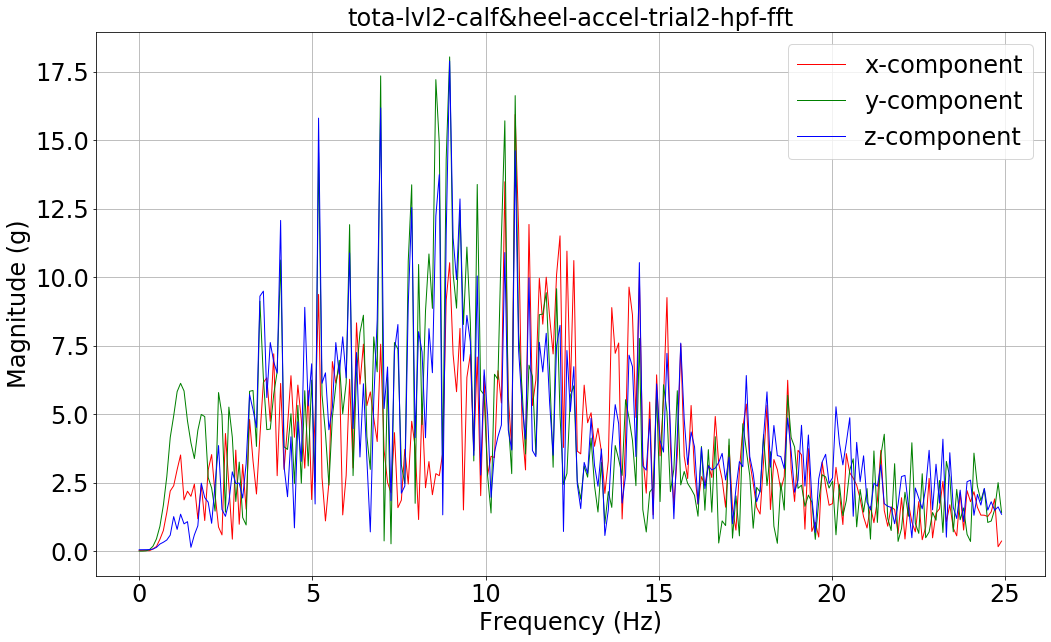

In [7]:
# ====================
# Input Parameters
# ====================
data_name = 'tota-lvl2-calf&heel-accel-trial2-hpf-fft' # Refer to 4.2 Reference List of Key Names to Plot for options to plot individually
savefig = False

plot_df = database[data_name]
visualize(data_name, plot_df, savefig)

---
### 4.3 Multiple Plots by Level of Severity

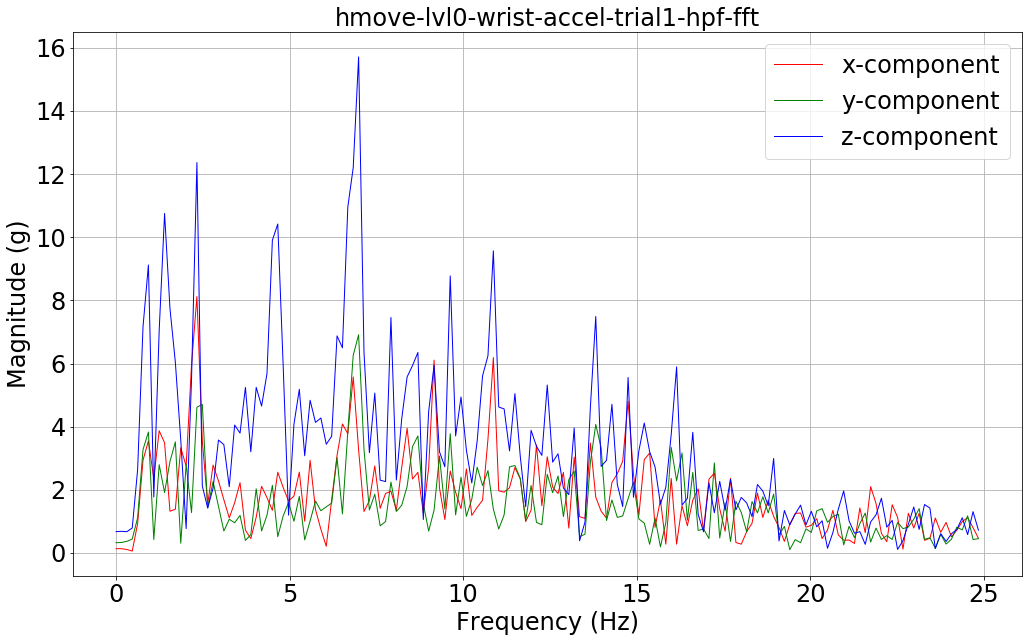

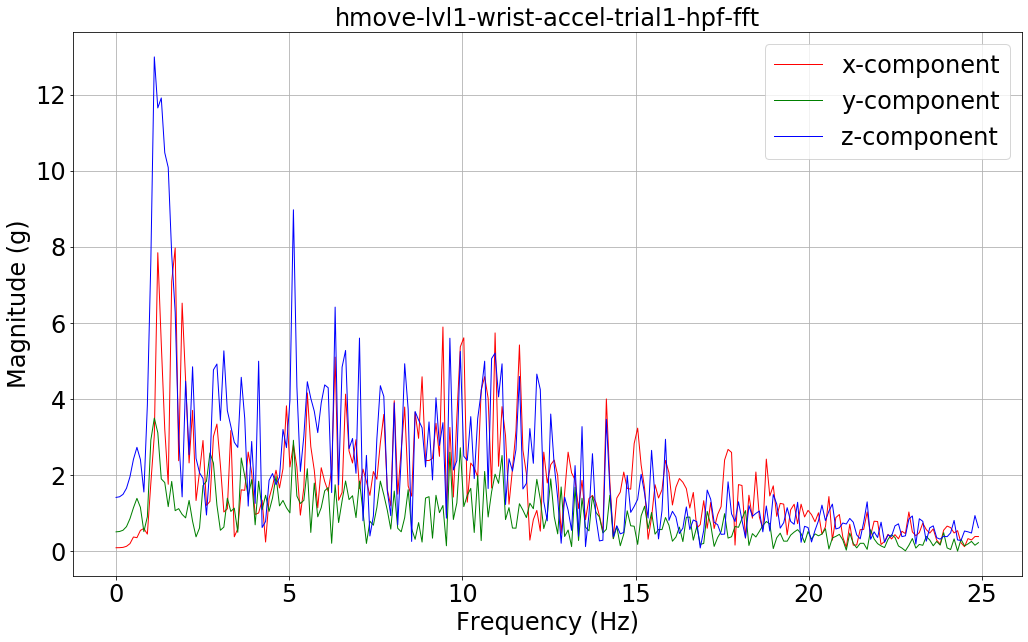

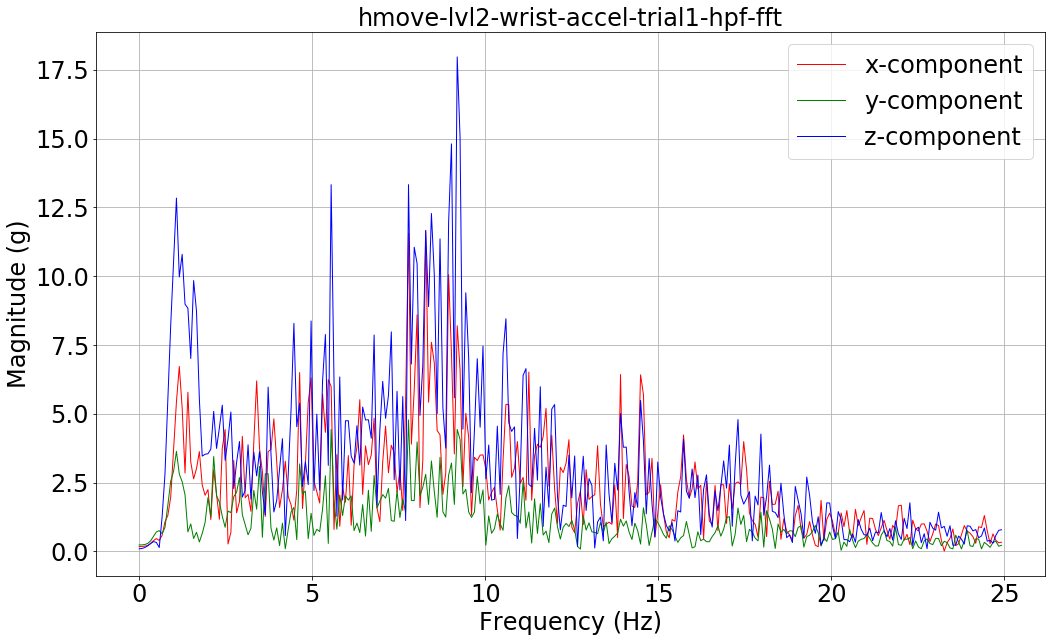

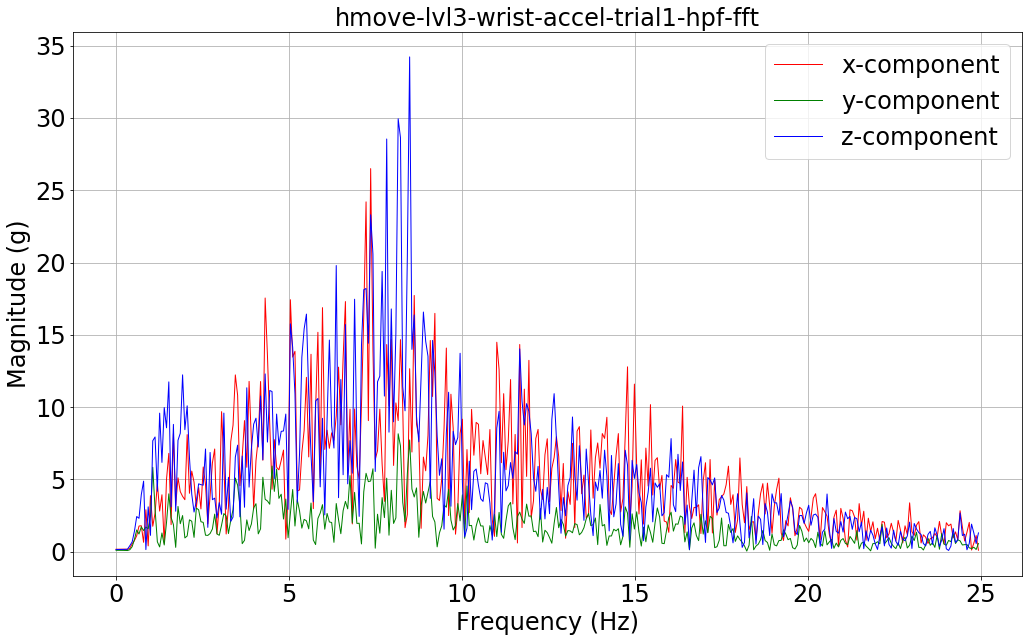

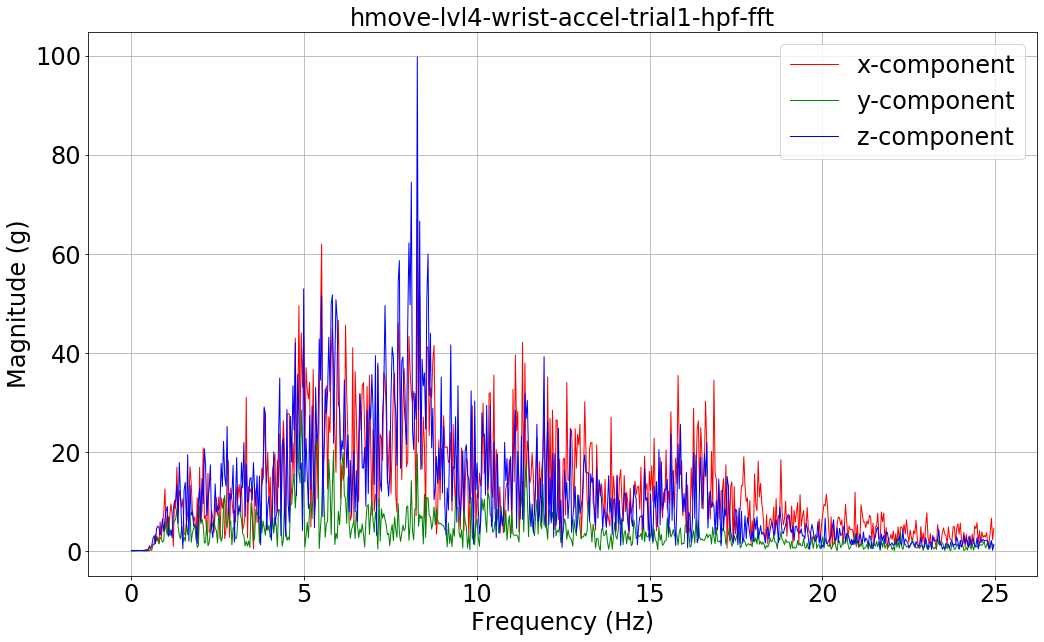

In [8]:
# ====================
# Input Parameters
# ====================
data_name_lst = lst_dict['hmove-wrist-accel-trial1-hpf-fft'] # Refer to 4.2 Lists of Multiple Plots for options of multiple plots
savefig = False 

for data_name in data_name_lst:
    plot_df = database[data_name]
    visualize(data_name, plot_df, savefig)

---
## 5.0 Feature Engineering in the Frequency Domain
```python 
1. Mean of Amplitude
2. Standard deviation of Amplitude
3. Median of Amplitude
4. Interquartile Range of Amplitude
5. Coefficient of Variation of Amplitude
6. Skewness of Amplitude Distribution
7. Kurtosis of Amplitude Distribution
```

---
## Patient003 Dataset
`Call list by: lst = lst_dict['name']`
```tex
ftap-wrist-accel-trial1-hpf-fft
ftap-wrist-accel-trial2-hpf-fft
ftap-wrist-accel-trial3-hpf-fft
ftap-wrist-gyro-trial1-hpf-fft
ftap-wrist-gyro-trial2-hpf-fft
ftap-wrist-gyro-trial3-hpf-fft

ftap-forearm-accel-trial1-hpf-fft
ftap-forearm-accel-trial2-hpf-fft
ftap-forearm-accel-trial3-hpf-fft
ftap-forearm-gyro-trial1-hpf-fft
ftap-forearm-gyro-trial2-hpf-fft
ftap-forearm-gyro-trial3-hpf-fft

hmove-wrist-accel-trial1-hpf-fft
hmove-wrist-accel-trial2-hpf-fft
hmove-wrist-accel-trial3-hpf-fft
hmove-wrist-gyro-trial1-hpf-fft
hmove-wrist-gyro-trial2-hpf-fft
hmove-wrist-gyro-trial3-hpf-fft

hmove-forearm-accel-trial1-hpf-fft
hmove-forearm-accel-trial2-hpf-fft
hmove-forearm-accel-trial3-hpf-fft
hmove-forearm-gyro-trial1-hpf-fft
hmove-forearm-gyro-trial2-hpf-fft
hmove-forearm-gyro-trial3-hpf-fft

tota-heel-accel-trial1-hpf-fft
tota-heel-accel-trial2-hpf-fft
tota-heel-accel-trial3-hpf-fft
tota-heel-gyro-trial1-hpf-fft
tota-heel-gyro-trial2-hpf-fft
tota-heel-gyro-trial3-hpf-fft

tota-calf&heel-accel-trial1-hpf-fft
tota-calf&heel-accel-trial2-hpf-fft
tota-calf&heel-accel-trial3-hpf-fft
tota-calf&heel-gyro-trial1-hpf-fft
tota-calf&heel-gyro-trial2-hpf-fft
tota-calf&heel-gyro-trial3-hpf-fft
```

---
### 5.1 Summary of All Features

In [79]:
# =================
# Input parameter
# =================
filename = 'ftap-lvl0-wrist-gyro-trial3-hpf-fft'

# =============================================
# Compute and display summary of all features
# =============================================
fs = 50
df = database[filename]
if 'fft' in filename: 
    processed_df = process_FFT(df, fs)
elif 'psd' in filename: 
    processed_df = process_PSD(df, fs)
stats_df = process_all_metrics(processed_df, filename)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
df

frequency (Hz)  FFT magnitude x-axis  FFT magnitude y-axis  FFT magnitude z-axis
0    0.000000        257.924000            8.063000              109.382000          
1    0.085034        769.772041            251.770612            358.214647          
2    0.170068        1356.300725           418.508546            789.069057          
3    0.255102        1846.241803           242.747209            712.516465          
4    0.340136        1004.205654           200.339032            1406.520884         
..        ...                ...                  ...                    ...         
289  24.574830       56.745321             66.562658             22.300149           
290  24.659864       135.761878            46.178792             37.763085           
291  24.744898       92.241846             39.915479             16.976883           
292  24.829932       4.248968              109.222633            68.813870           
293  24.914966       39.922753             39.577763             17.511902           

[294 rows x 4 columns]

In [80]:
print(filename)
stats_df

ftap-lvl0-wrist-gyro-trial3-hpf-fft


metric name                                                     metric description  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
0  mean        Computed average value of amplitudes in the frequency domain           16929.162821    12829.656980    4004.092554   
1  std         Computed standard deviation of amplitudes in the frequency domain      18431.038822    19848.947824    7239.609005   
2  median      50th percentile value of the amplitudes in the frequency domain        10798.481853    8072.537253     1994.482514   
3  iqr         Interquartile range of the amplitudes in the frequency domain          14495.975732    6176.197377     2286.040284   
4  count       Number of amplitude observations in the frequency domain               147.000000      147.000000      147.000000    
5  min         Absolute minimum value of amplitude in the frequency domain            1086.161432     1297.373495     296.990552    
6  max         Absolute maximum value of amplitude in the frequency domain            155563.805669   201346.490979   67794.757677  
7  cov         Coefficient of variation of amplitudes in the frequency domain         1.085006        1.541843        1.801892      
8  skewness    Sample skewness of the amplitude distribution in the frequency domain  3.858337        6.638704        5.757537      
9  kurtosis    Sample kurtosis of the amplitude distribution in the frequency domain  22.144523       55.602870       42.192569

---
### 5.2 Summary Statistics, IQR, COV, Skewness and Kurtosis

In [61]:
# ====================
# Input Parameters
# ====================
# lst1 = lst_dict['ftap-wrist-accel-trial1-hpf-fft']
# lst2 = lst_dict['ftap-wrist-accel-trial2-hpf-fft']
# lst3 = lst_dict['ftap-wrist-accel-trial3-hpf-fft']

lst1 = lst_dict['hmove-wrist-accel-trial1-hpf-fft']
lst2 = lst_dict['hmove-wrist-accel-trial2-hpf-fft']
lst3 = lst_dict['hmove-wrist-accel-trial3-hpf-fft']

# lst1 = lst_dict['tota-heel-accel-trial1-hpf-fft']
# lst2 = lst_dict['tota-heel-accel-trial2-hpf-fft']
# lst3 = lst_dict['tota-heel-accel-trial3-hpf-fft']

savefig = False
show_coordinates = True
mpld3.disable_notebook()

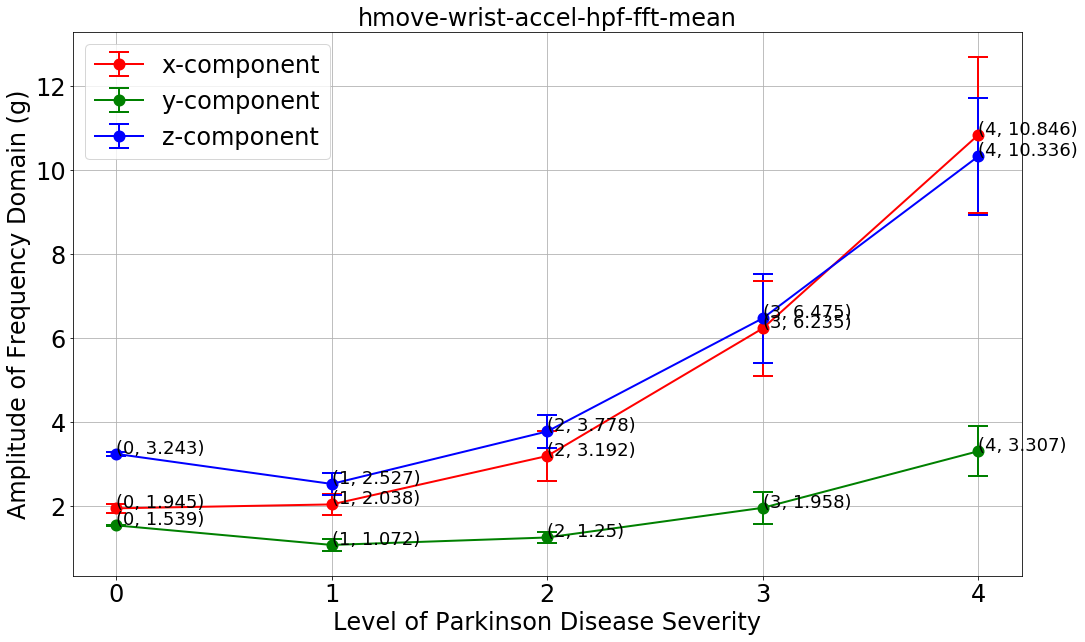

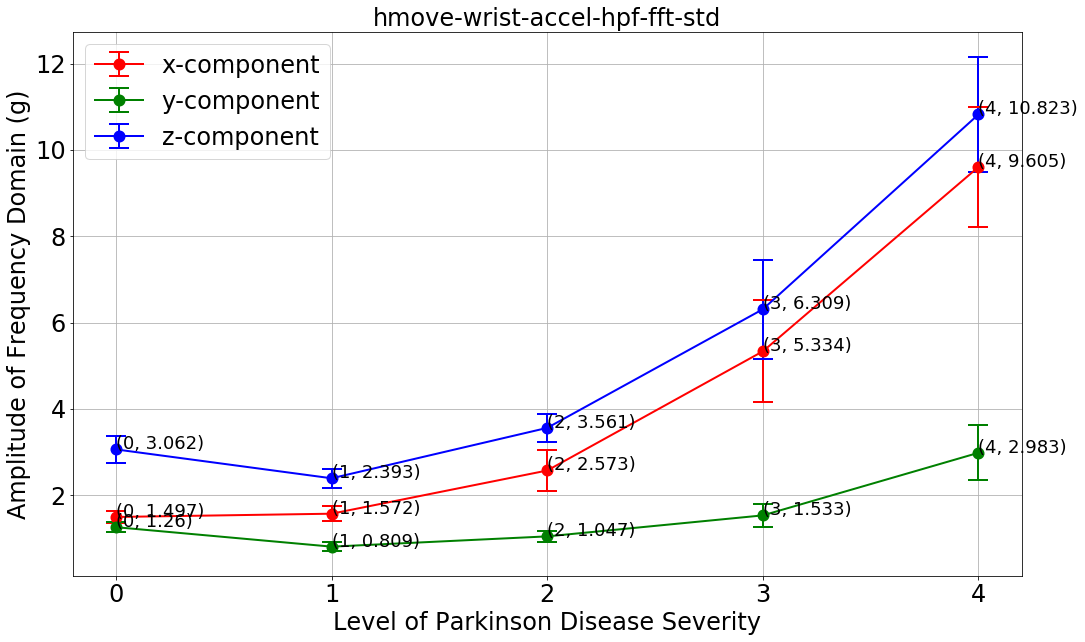

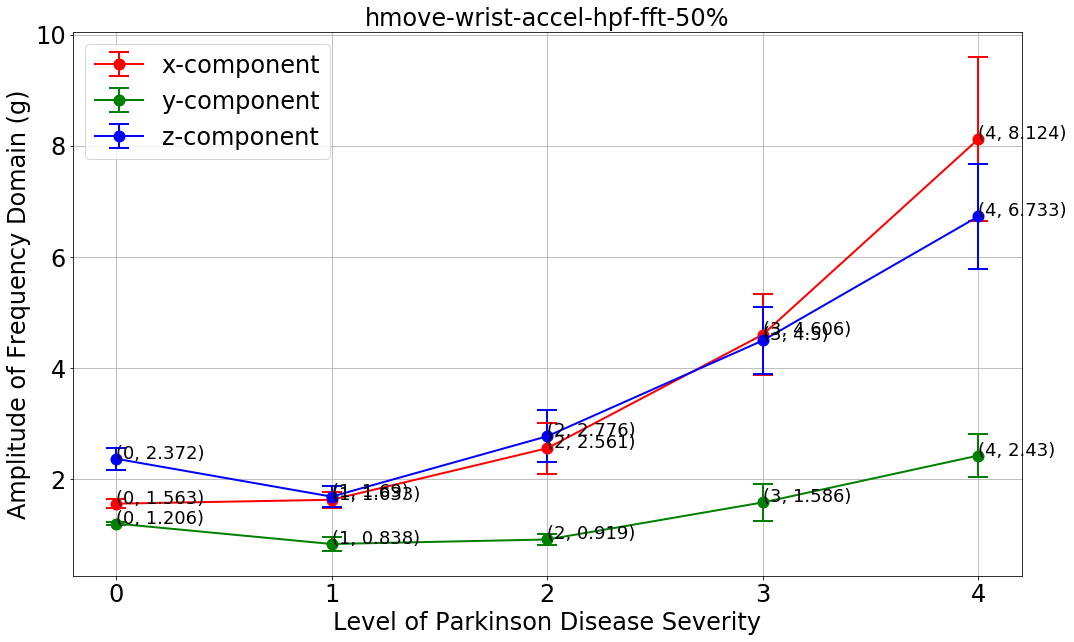

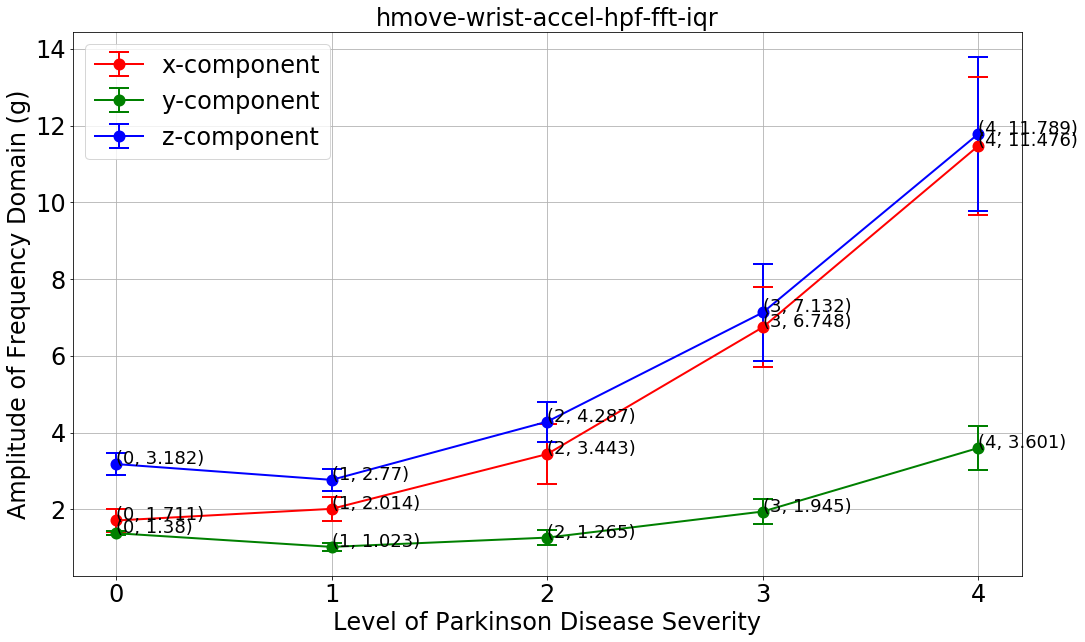

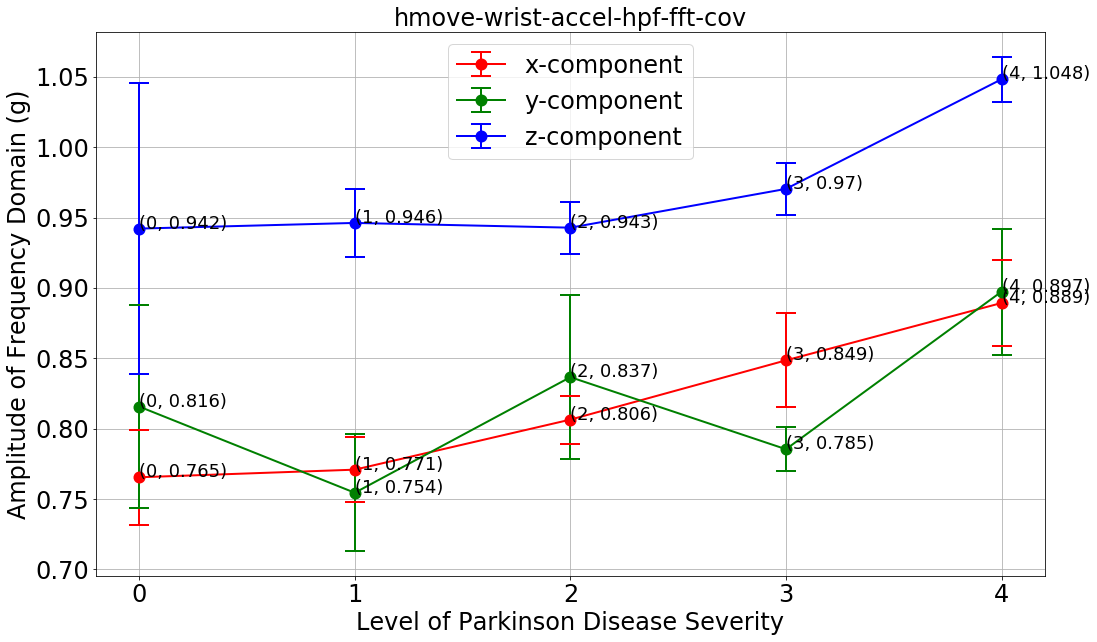

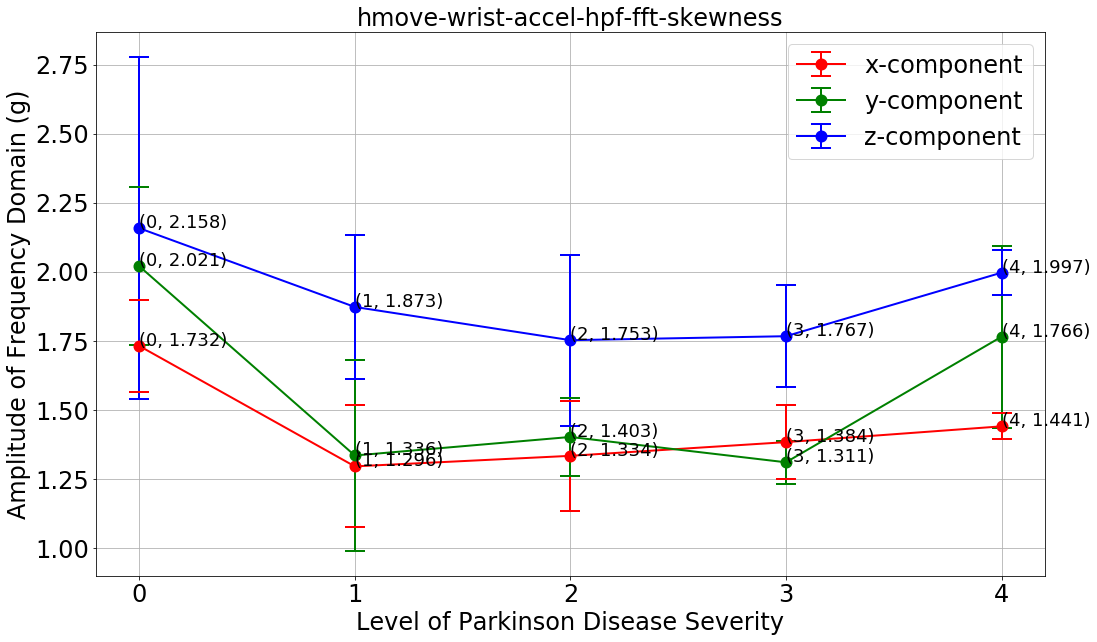

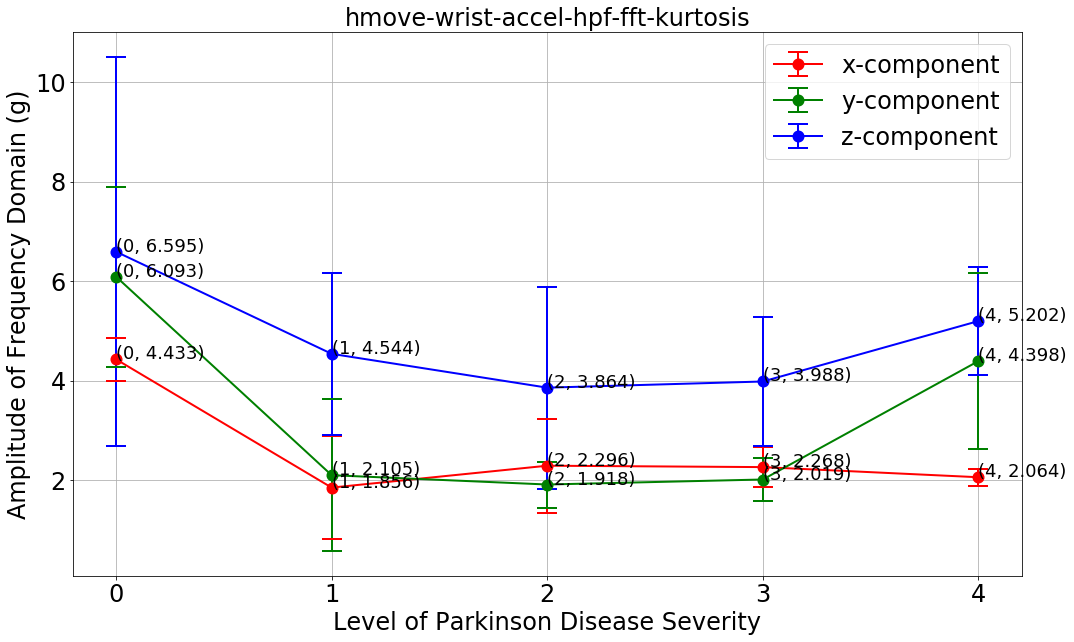

In [62]:
# ============================================================
# 5.1 Summary Statistics (mean, std, Q1, median, Q3, max)
# ============================================================
stats_lst = ['mean', 'std', '50%'] # ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
for stats_type in stats_lst: 
    stats_df_1 = process_summary_stats(database, stats_type, lst1)
    stats_df_2 = process_summary_stats(database, stats_type, lst2)
    stats_df_3 = process_summary_stats(database, stats_type, lst3)
    stats_df = process_averaged_stats(stats_df_1, stats_df_2, stats_df_3)
    plot_stats_with_error_bars(stats_df, savefig, show_coordinates)
    
# ===================================
# 5.2 Interquartile Range (Q3 - Q1)
# ===================================
iqr_stats_df_1 = process_IQR_stats(database, lst1)
iqr_stats_df_2 = process_IQR_stats(database, lst2)
iqr_stats_df_3 = process_IQR_stats(database, lst3)
iqr_stats_df = process_averaged_stats(iqr_stats_df_1, iqr_stats_df_2, iqr_stats_df_3)
plot_stats_with_error_bars(iqr_stats_df, savefig, show_coordinates)

# ========================================
# 5.3 Coefficient of Variation (mean/std)
# ========================================
cov_stats_df_1 = process_variation_stats(database, lst1)
cov_stats_df_2 = process_variation_stats(database, lst2)
cov_stats_df_3 = process_variation_stats(database, lst3)
cov_stats_df = process_averaged_stats(cov_stats_df_1, cov_stats_df_2, cov_stats_df_3)
plot_stats_with_error_bars(cov_stats_df, savefig, show_coordinates)

# =======================================
# 5.4 Skewness of Amplitude Distribution
# =======================================
skew_stats_df_1 = process_skew_stats(database, lst1)
skew_stats_df_2 = process_skew_stats(database, lst2)
skew_stats_df_3 = process_skew_stats(database, lst3)
skew_stats_df = process_averaged_stats(skew_stats_df_1, skew_stats_df_2, skew_stats_df_3)
plot_stats_with_error_bars(skew_stats_df, savefig, show_coordinates)

# =======================================
# 5.5 Kurtosis of Amplitude Distribution
# =======================================
kurt_stats_df_1 = process_kurt_stats(database, lst1)
kurt_stats_df_2 = process_kurt_stats(database, lst2)
kurt_stats_df_3 = process_kurt_stats(database, lst3)
kurt_stats_df = process_averaged_stats(kurt_stats_df_1, kurt_stats_df_2, kurt_stats_df_3)
plot_stats_with_error_bars(kurt_stats_df, savefig, show_coordinates)

---
## 6.0 Distribution Statistics Testground

### 6.1 Single Axis Amplitude Distribution Plots

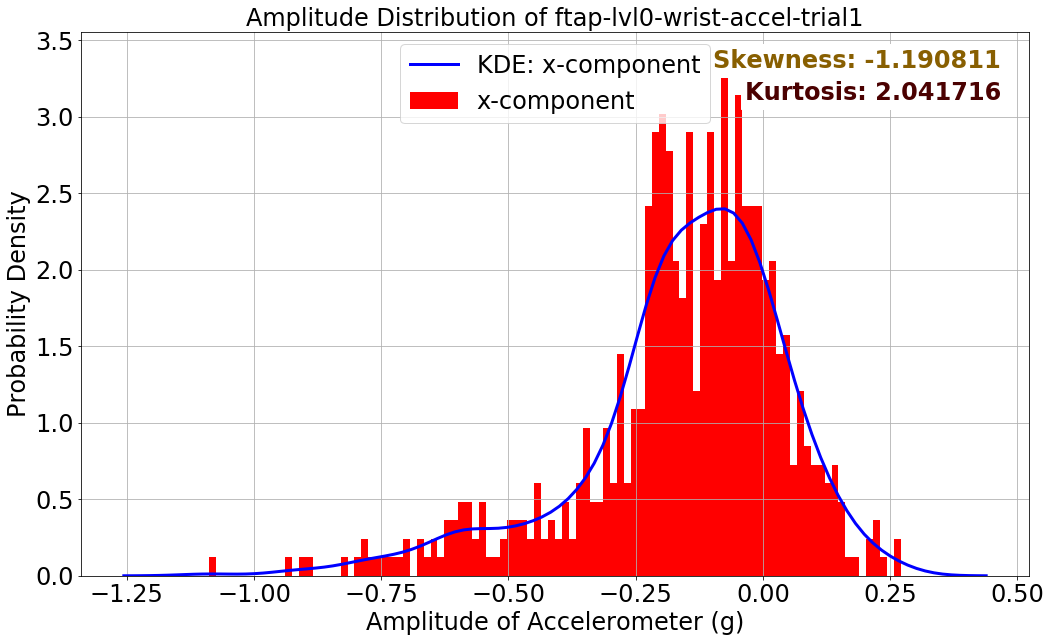

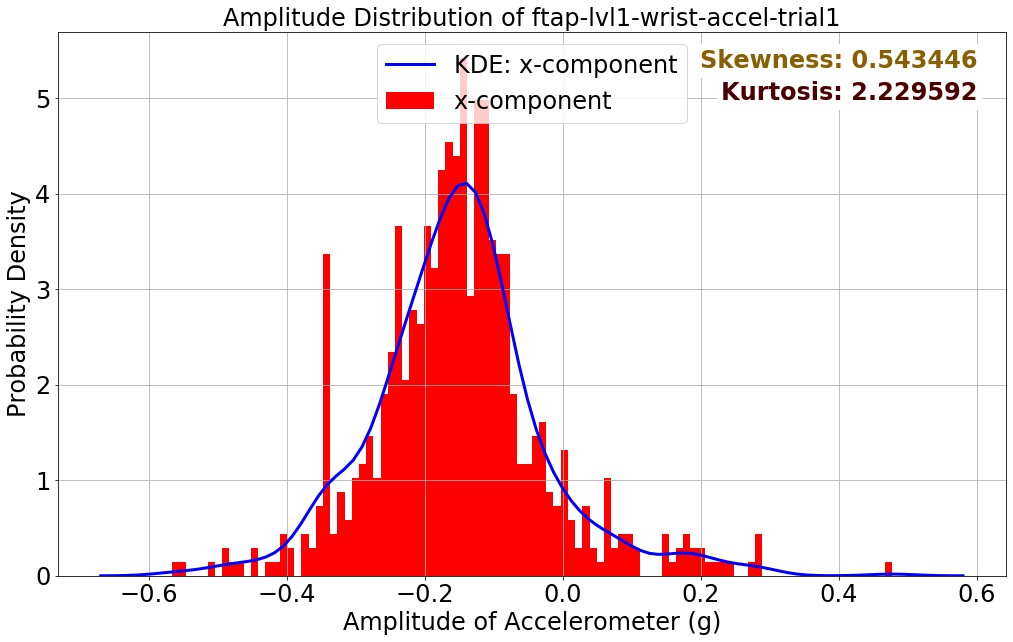

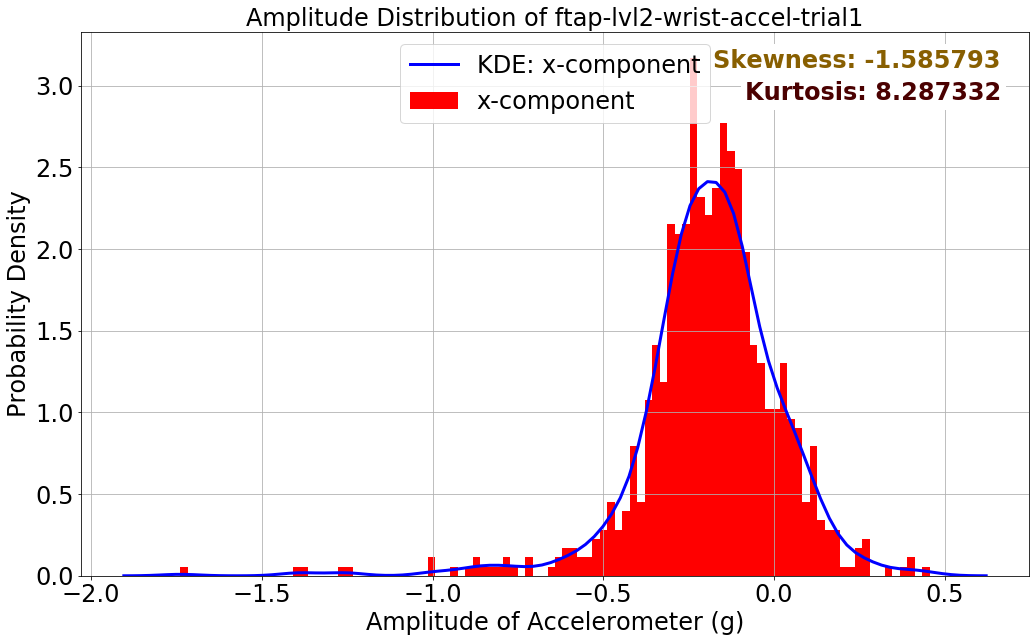

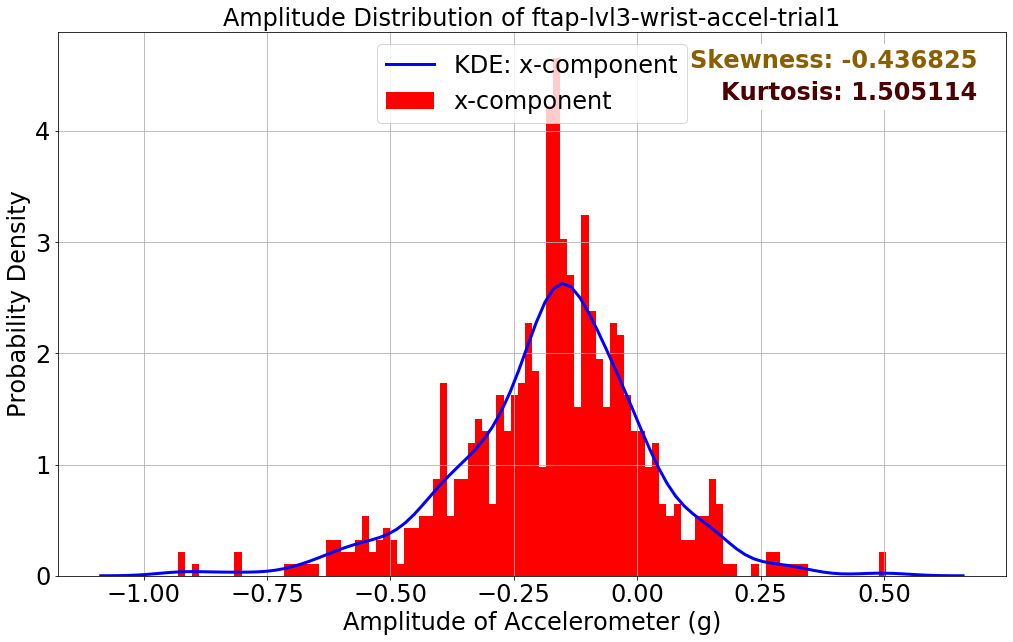

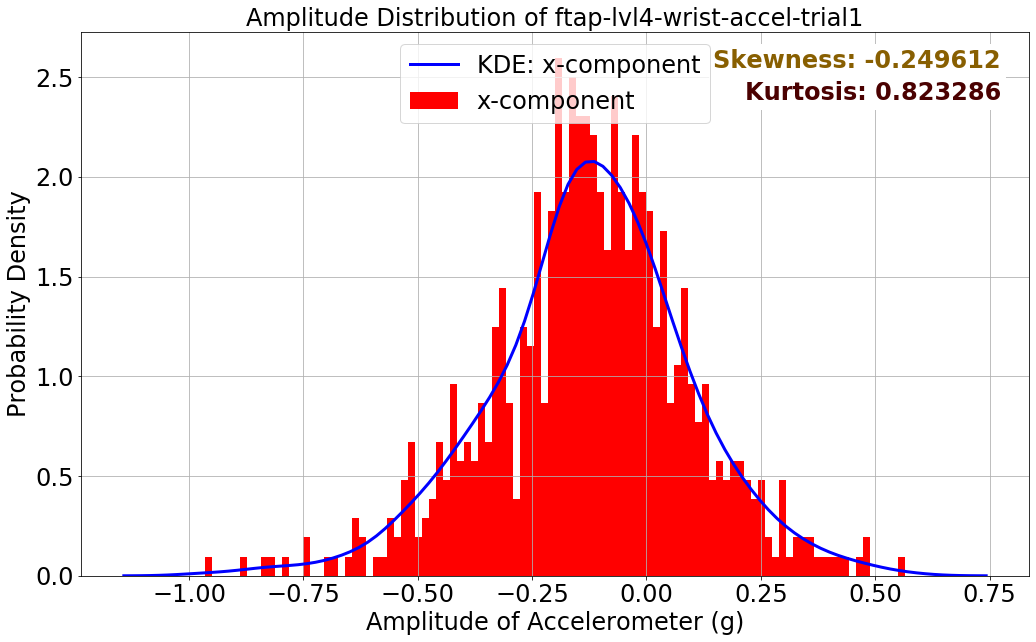

In [12]:
def single_dist_kde_ts_plot(data_name, plot_df, savefig): 
    fig, ax = plt.subplots()
    ax = sns.distplot(plot_df['x-axis (g)'], bins=100,
                      kde_kws={"color": 'b', "lw": 3, "label": "KDE: "+'x-component'},
                      hist_kws={"histtype": "bar", "linewidth": 1, "alpha": 1, "color": 'r', "label": 'x-component'})
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % skew(plot_df['x-axis (g)']), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(plot_df['x-axis (g)']), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
    plt.ylabel('Probability Density')
    plt.xlabel('Amplitude of Accelerometer (g)')
    plt.title(f'Amplitude Distribution of {data_name}')
    plt.legend(loc='upper center')
    plt.grid()

# ====================
# Input Parameters
# ====================
lst = ['ftap-lvl0-wrist-accel-trial1', 'ftap-lvl1-wrist-accel-trial1', 'ftap-lvl2-wrist-accel-trial1', 'ftap-lvl3-wrist-accel-trial1', 'ftap-lvl4-wrist-accel-trial1']
savefig = False 

for key in lst:
    plot_df = database[key]
    single_dist_kde_ts_plot(key, plot_df, savefig)


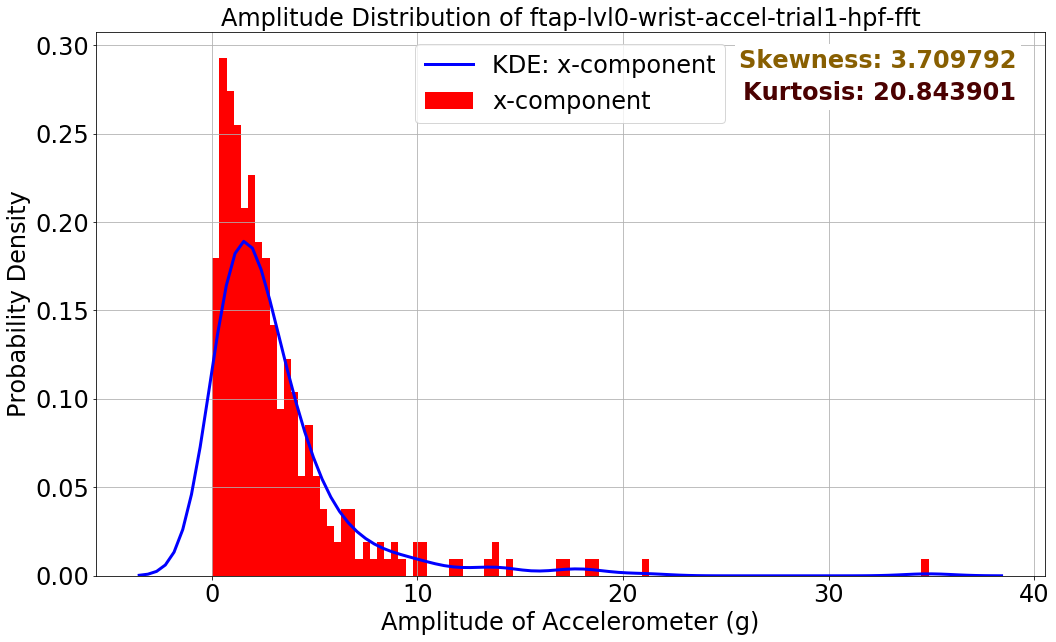

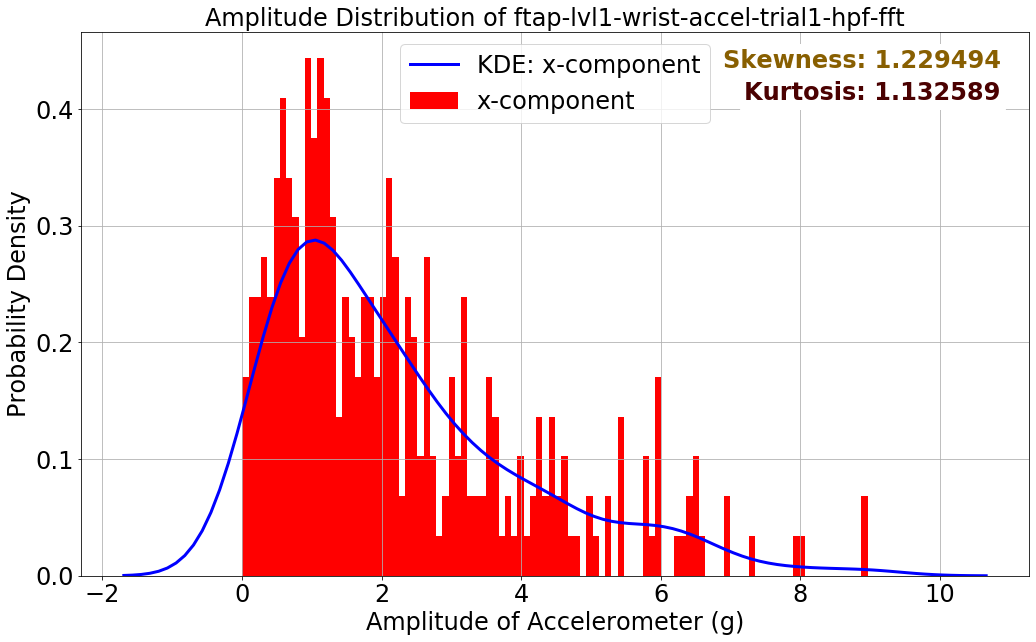

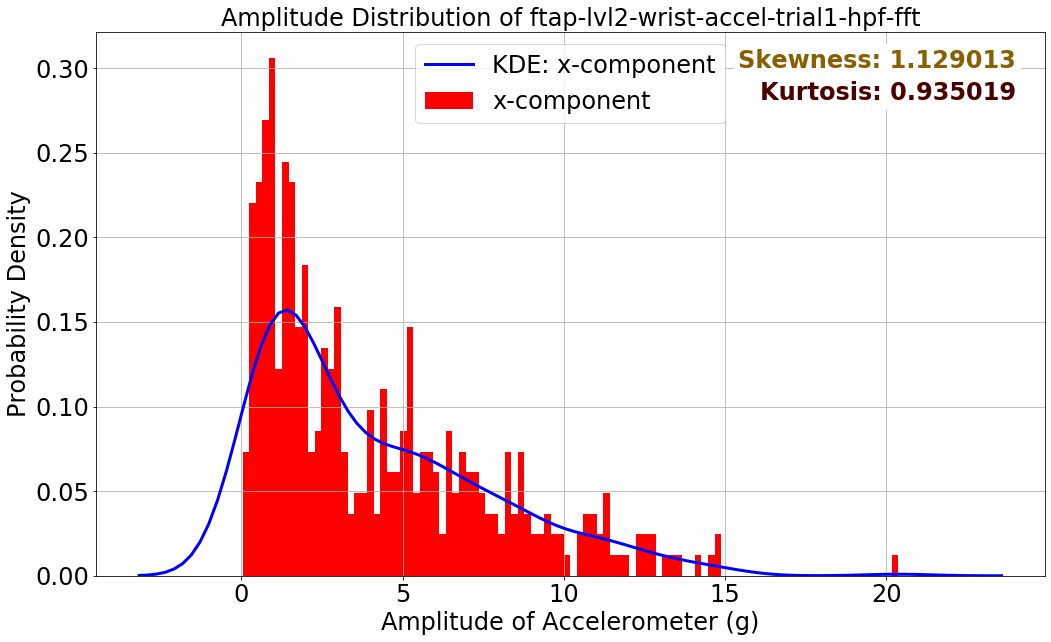

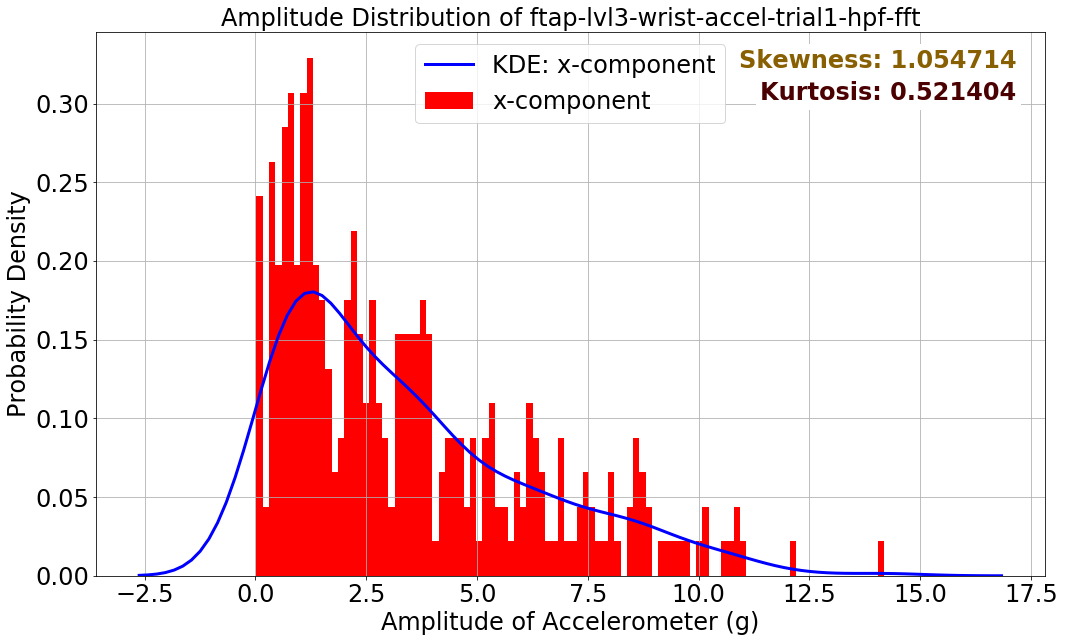

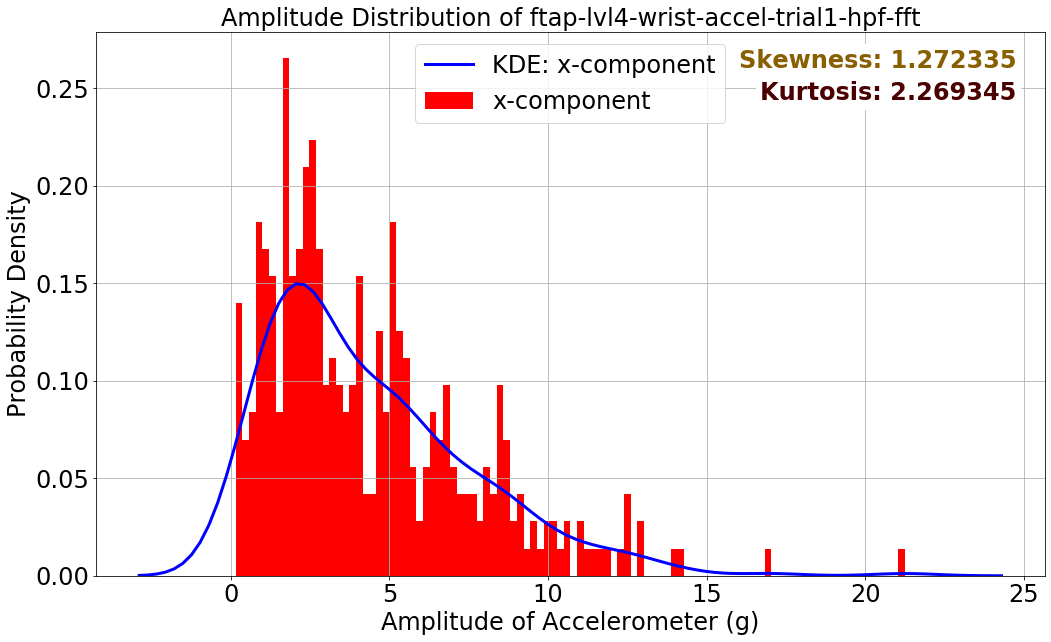

In [13]:
def single_dist_kde_plot(data_name, plot_df, savefig): 
    fig, ax = plt.subplots()
    ax = sns.distplot(plot_df['FFT magnitude x-axis'], bins=100,
                      kde_kws={"color": 'b', "lw": 3, "label": "KDE: "+'x-component'},
                      hist_kws={"histtype": "bar", "linewidth": 1, "alpha": 1, "color": 'r', "label": 'x-component'})
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % skew(plot_df['FFT magnitude x-axis']), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(plot_df['FFT magnitude x-axis']), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
    plt.ylabel('Probability Density')
    plt.xlabel('Amplitude of Accelerometer (g)')
    plt.title(f'Amplitude Distribution of {data_name}')
    plt.legend(loc='upper center')
    plt.grid()
    
# ====================
# Input Parameters
# ====================
lst = lst_dict['ftap-wrist-accel-trial1-hpf-fft'] # Refer to 4.2 Lists of Multiple Plots for options of multiple plots
savefig = False 

for key in lst:
    plot_df = database[key]
    single_dist_kde_plot(key, plot_df, savefig)

---
### 6.2 Amplitude Distribution Plots

In [14]:
def plot_FFT_histogram(data_name, plot_df, density, savefig):
    # =============================================
    # Instantiate Plot for Histogram 
    # =============================================
    fig, ax = plt.subplots() # Instantiate object tuples for MatplotLib plots
    color_map = ['r', 'g', 'b'] # List of color codes to enumerate to when plotting
    labels = ['x-component', 'y-component', 'z-component'] # List of legend labels to enumerate to when plotting
    if 'fft' in data_name:
        col_name = ['FFT magnitude x-axis', 'FFT magnitude y-axis', 'FFT magnitude z-axis'] # Pinpointing the required columns to extract the vertical axis values required for the plot
    elif 'accel' in data_name:
        col_name = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)']
    elif 'gyro' in data_name:
        col_name = ['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']
        
    num_bins = 100 # Specify the bin size of the Histogram

    # Plot all three x, y and z axes in the same graph
    for i in range(3):
        ax.hist(plot_df[col_name[i]], num_bins, density=density, facecolor=color_map[i], alpha=0.75, label=labels[i])

    # =============================================
    # Plot Axes Customisation
    # =============================================
    ax.set_xlabel('Amplitude of Accelerometer (g)')
    if density == True: 
        ax.set_ylabel('Probability Density')
    else: 
        ax.set_ylabel('Number of Occurrences')
    ax.set_title(f'Amplitude Distribution of {data_name}')
    ax.legend(loc='best')
    ax.grid()

    # =============================================
    # Save Plot
    # =============================================
    # Toggle to save the figure as a .png file
    if savefig == True: 
        fig.savefig(f'{data_name}.png')
        
def plot_FFT_KDE(data_name, plot_df, savefig):
    # =============================================
    # Instantiate Plot for Histogram 
    # =============================================
    fig, ax = plt.subplots() # Instantiate object tuples for MatplotLib plots
    color_map = ['r', 'g', 'b'] # List of color codes to enumerate to when plotting
    labels = ['x-component', 'y-component', 'z-component'] # List of legend labels to enumerate to when plotting
    if 'fft' in data_name:
        col_name = ['FFT magnitude x-axis', 'FFT magnitude y-axis', 'FFT magnitude z-axis'] # Pinpointing the required columns to extract the vertical axis values required for the plot
    elif 'accel' in data_name:
        col_name = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)']
    elif 'gyro' in data_name:
        col_name = ['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']
    num_bins = 100 # Specify the bin size of the Histogram

    # Plot all three x, y and z axes in the same graph
    for i in range(3):
#         sns.distplot(plot_df[col_name[i]], kde=True, color=color_map[i], bins=num_bins, label=labels[i])
        ax = sns.distplot(plot_df[col_name[i]], bins=num_bins,
                          kde_kws={"color": color_map[i], "lw": 3, "label": "KDE: "+labels[i]},
                          hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 1, "color": color_map[i], "label": labels[i]})
    
#         ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_df[col_name[i]].skew(), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')
#         ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_df[col_name[i]].kurt(), fontweight='demibold', fontsize=24, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')


    # =============================================
    # Plot Axes Customisation
    # =============================================
    ax.set_xlabel('Amplitude of Accelerometer (g)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Amplitude Distribution of {data_name}')
    ax.legend(loc='best')
    ax.grid()

    # =============================================
    # Save Plot
    # =============================================
    # Toggle to save the figure as a .png file
    if savefig == True: 
        fig.savefig(f'{data_name}.png')

---
### 6.2.1 Probability Distribution Plots

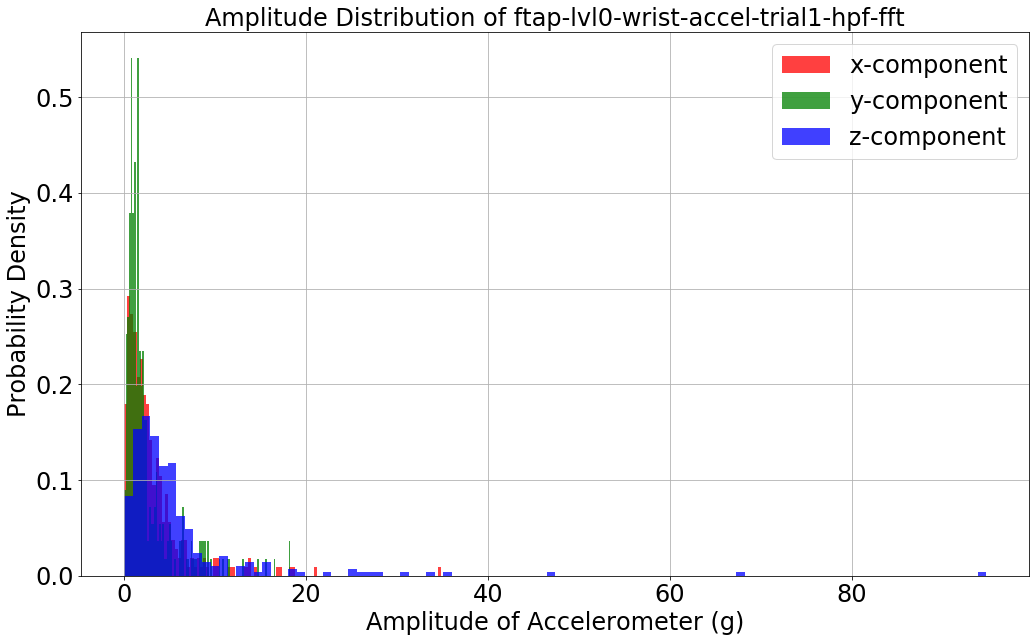

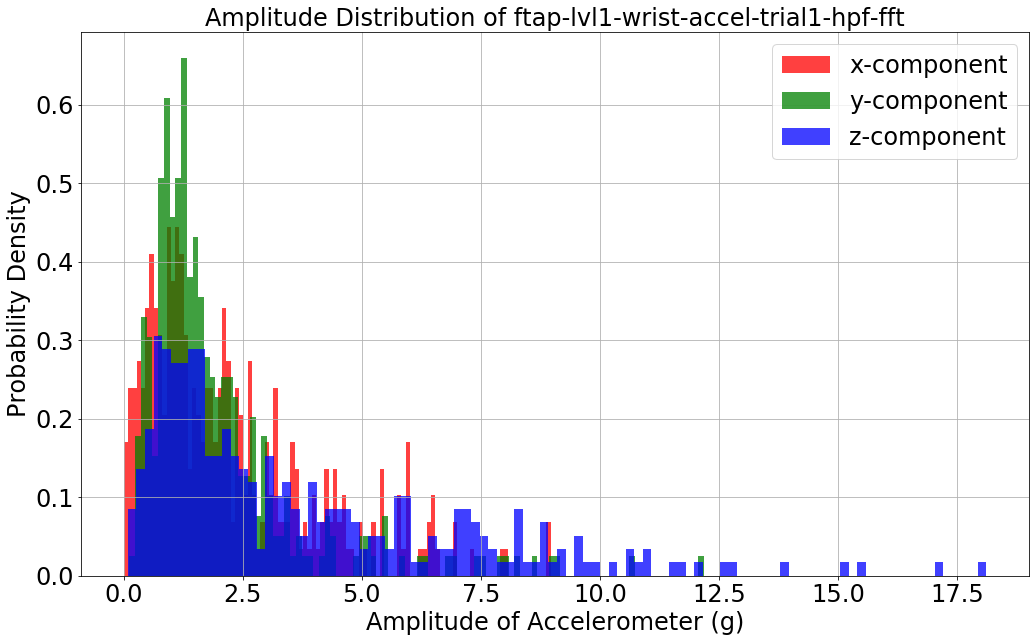

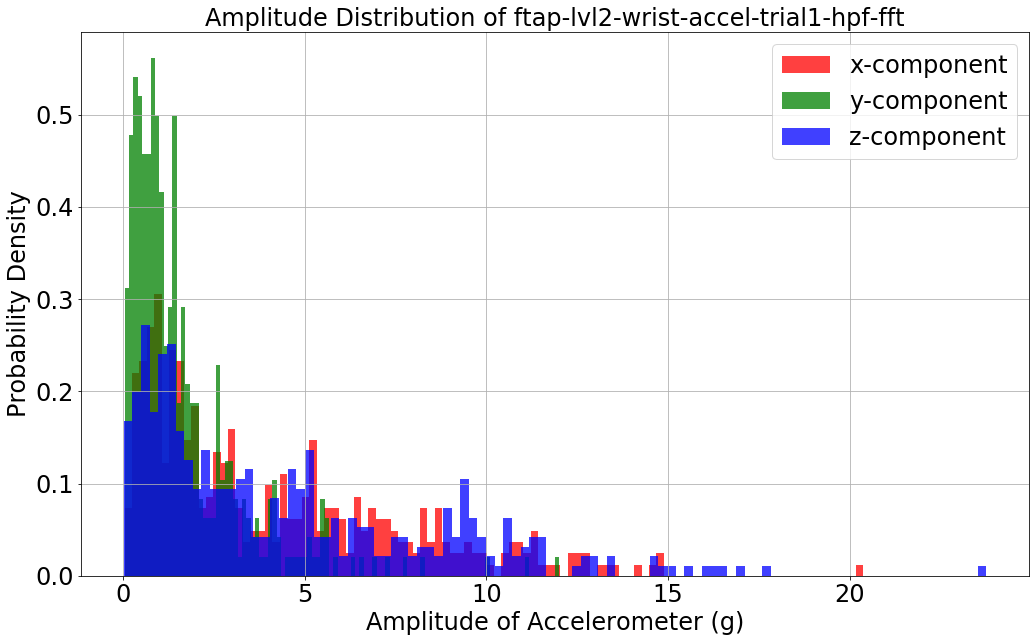

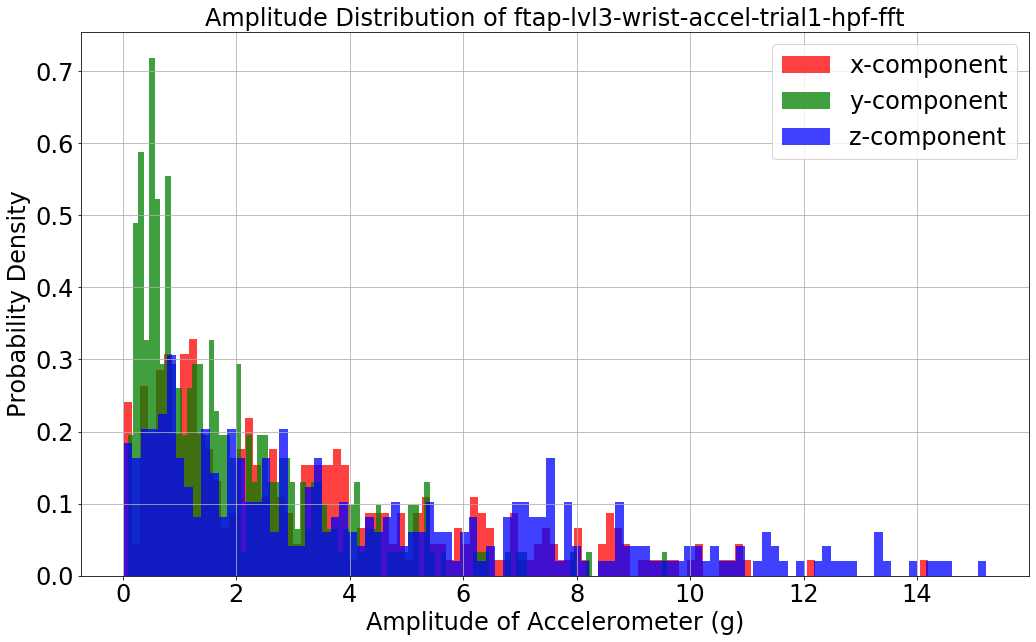

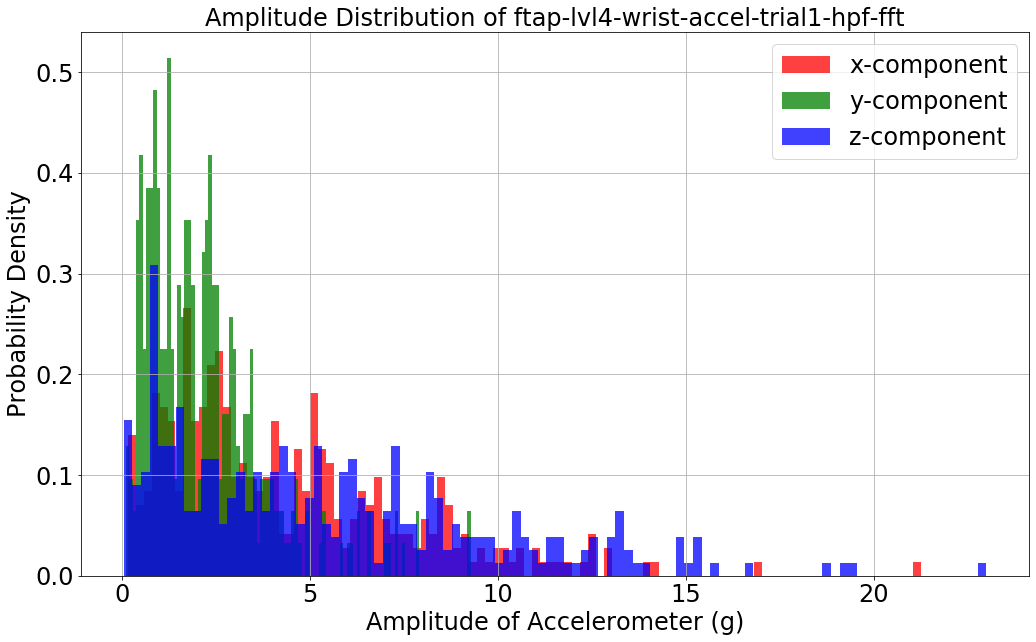

In [15]:
# ====================
# Input Parameters
# ====================
lst = lst_dict['ftap-wrist-accel-trial1-hpf-fft'] # Refer to 4.2 Lists of Multiple Plots for options of multiple plots
density = True
savefig = False 

for key in lst:
    plot_df = database[key]
    plot_FFT_histogram(key, plot_df, density, savefig)

---
### 6.2.2 Kernel Density Estimates Plots

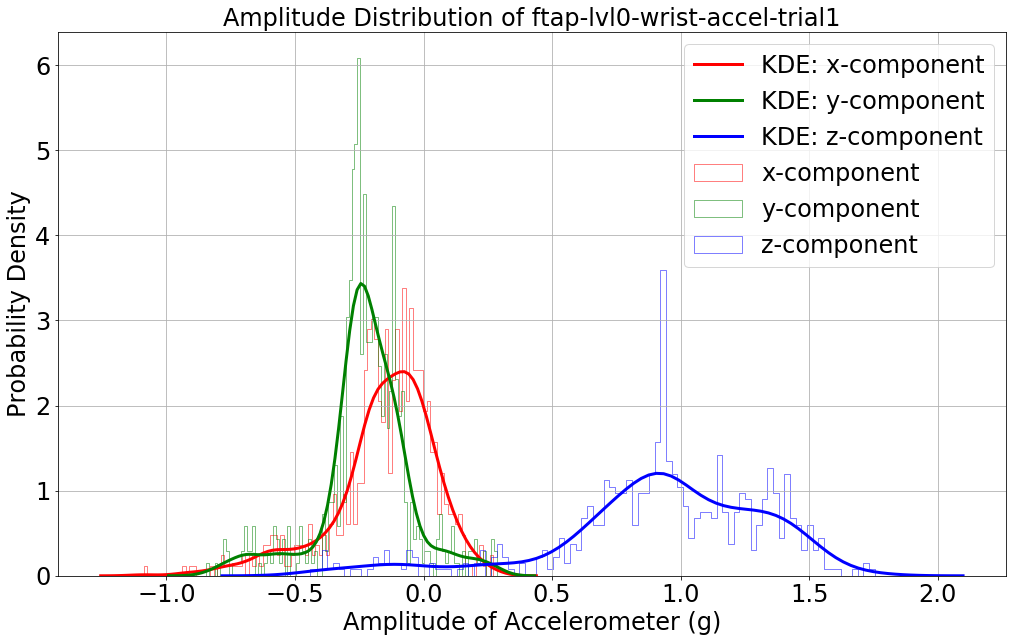

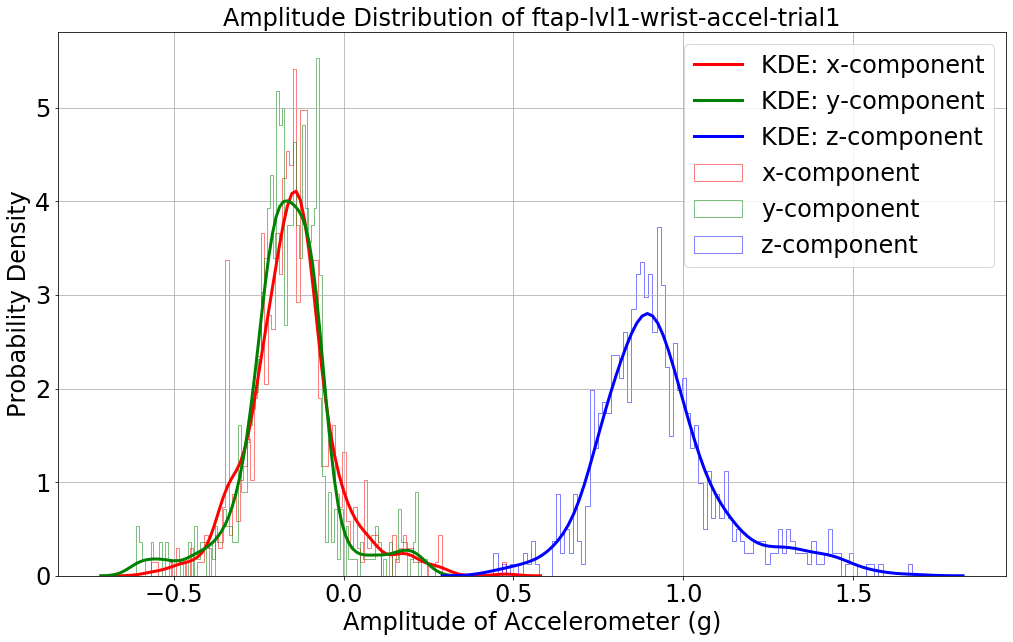

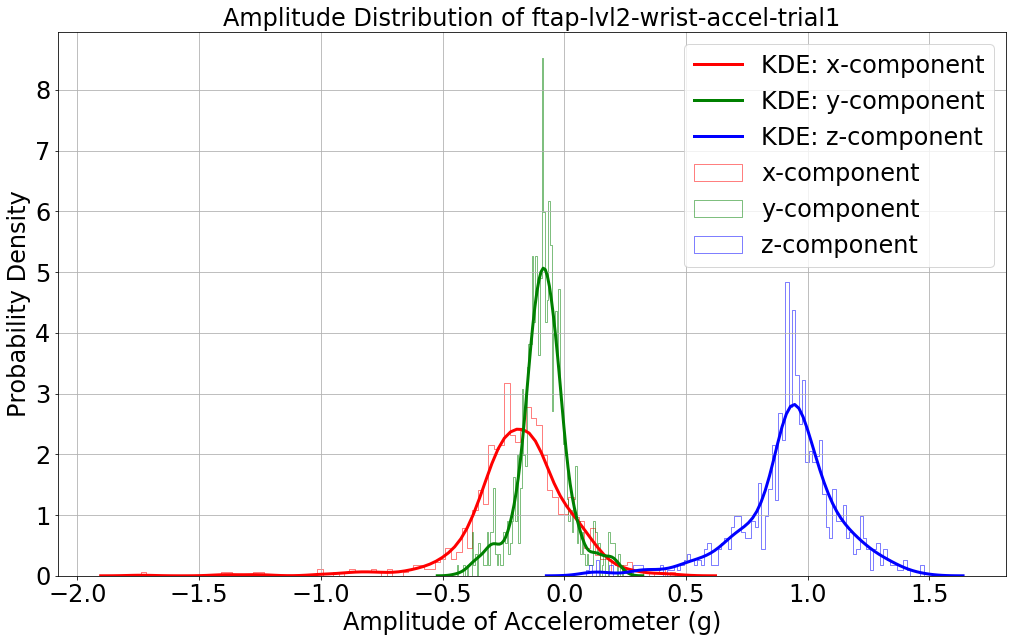

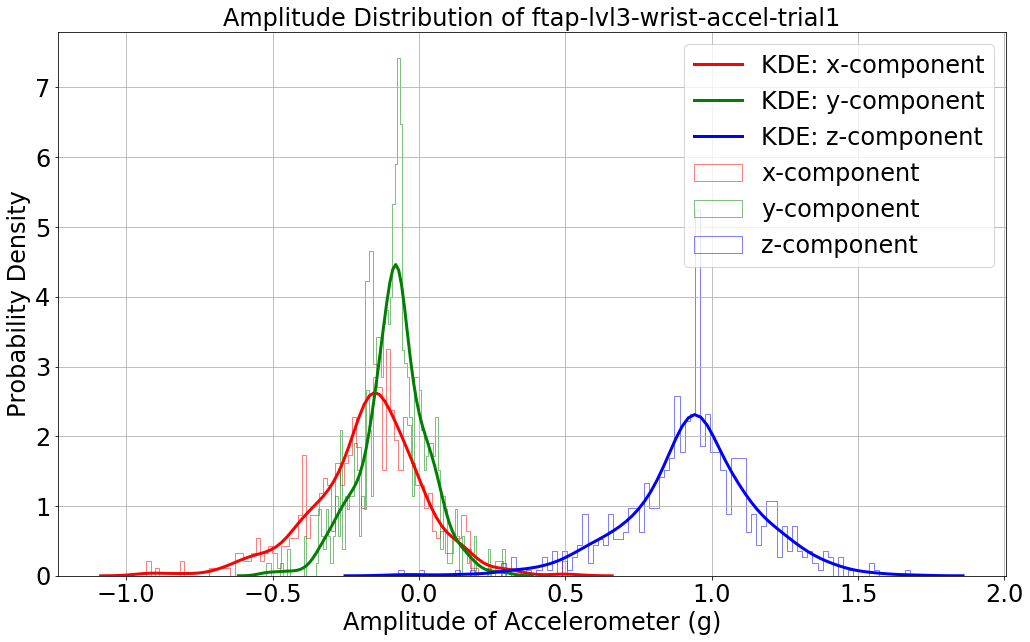

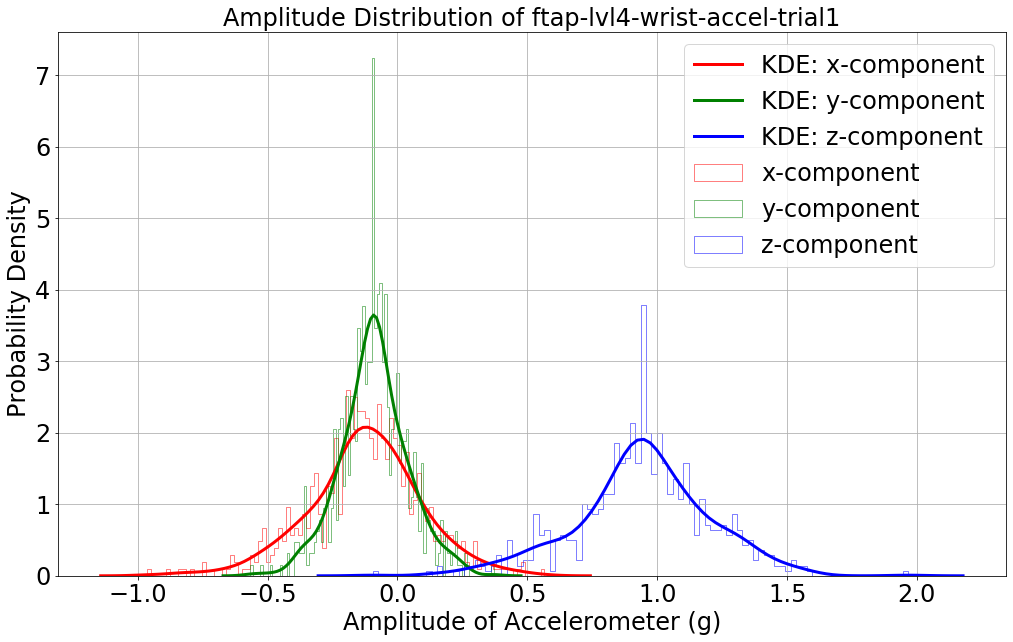

In [16]:
# ====================
# Input Parameters
# ====================
# lst = lst_dict['ftap-wrist-accel-trial1-hpf-fft'] # Refer to 4.2 Lists of Multiple Plots for options of multiple plots
lst = ['ftap-lvl0-wrist-accel-trial1', 'ftap-lvl1-wrist-accel-trial1', 'ftap-lvl2-wrist-accel-trial1', 'ftap-lvl3-wrist-accel-trial1', 'ftap-lvl4-wrist-accel-trial1']
savefig = False 

for key in lst:
    plot_df = database[key]
    plot_FFT_KDE(key, plot_df, savefig)